In [1]:
import pandas as pd
import numpy as np

import pycountry
# visualisation
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import norm
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool,Select
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output


# stats
from scipy.stats import pearsonr


# ML
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE, RFECV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_21023/602237791.py:20: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


### Wholesale Price Index (Excl VAT) for Building and Construction Materials

In [2]:
# construction market indices
df_wpm=pd.read_csv('WPM28.20230512223723.csv')
df_wpm.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C01409V03262,Type of Material,UNIT,VALUE
0,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,-,Materials,Base 2015=100,99.2
1,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,601,"Stone, sand and gravel",Base 2015=100,95.7
2,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,60161,Sand and gravel,Base 2015=100,98.0
3,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,60162,Stone,Base 2015=100,95.3
4,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,611,Cement,Base 2015=100,100.0


In [3]:
df_wpm["Type of Material"].value_counts()

Materials                                               297
Stone, sand and gravel                                  297
Bituminous macadam, asphalt and bituminous emulsions    297
Bituminous macadam and asphalt                          297
Bituminous emulsions                                    297
Electrical fittings                                     297
Lighting equipment                                      297
Protection and communication equipment                  297
All other materials                                     297
Plumbing materials including sanitary ware              297
HVAC (heating and ventilation equipment)                297
Insulating materials                                    297
Pipes and fittings                                      297
PVC pipes and fittings                                  297
Copper pipes and fittings                               297
Plaster                                                 297
Paints, oils and varnishes              

In [4]:
len(df_wpm["Type of Material"].unique())

40

In [5]:
df_wpm.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C01409V03262',
       'Type of Material', 'UNIT', 'VALUE'],
      dtype='object')

In [6]:
cols=["Date",'Month',"Material","Wholesale_Price_Index"]
df_wpm=df_wpm[['TLIST(M1)','Month','Type of Material','VALUE']]
df_wpm.columns=cols
df_wpm=df_wpm[df_wpm['Material']!='Materials']
df_wpm.head()

,Date,Month,Material,Wholesale_Price_Index
1,201501,2015 January,"Stone, sand and gravel",95.7
2,201501,2015 January,Sand and gravel,98.0
3,201501,2015 January,Stone,95.3
4,201501,2015 January,Cement,100.0
5,201501,2015 January,Ready mixed mortar and concrete,101.6


In [7]:
df_wpm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11583 entries, 1 to 11879
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   11583 non-null  int64  
 1   Month                  11583 non-null  object 
 2   Material               11583 non-null  object 
 3   Wholesale_Price_Index  11064 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.5+ KB


In [8]:
df_wpm['Date'] =df_wpm['Date'].astype(str)

# Extract year, month, and quarter into separate columns
df_wpm['Year'] = df_wpm['Date'].str[:4].astype(int)
df_wpm['Month'] = df_wpm['Date'].str[-2:].astype(int)
df_wpm['Quarter'] = pd.to_datetime(df_wpm['Date'], format='%Y%m').dt.quarter.astype(int)
df_wpm['Wholesale_Price_Index']=df_wpm['Wholesale_Price_Index'].astype(float)
df_wpm.head()


,Date,Month,Material,Wholesale_Price_Index,Year,Quarter
1,201501,1,"Stone, sand and gravel",95.7,2015,1
2,201501,1,Sand and gravel,98.0,2015,1
3,201501,1,Stone,95.3,2015,1
4,201501,1,Cement,100.0,2015,1
5,201501,1,Ready mixed mortar and concrete,101.6,2015,1


### New Dwelling Completion

In [9]:
df_ndc=pd.read_csv('NDQ06.csv')
df_ndc.head()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C02342V02816,Type of House,C03789V04537,Local Authority,UNIT,VALUE
0,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-1434-13a3-e055-000000000001,Cork City Council,Number,8
1,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-14a2-13a3-e055-000000000001,Clare County Council,Number,45
2,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,21
3,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-14a3-13a3-e055-000000000001,Cork County Council,Number,145
4,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,17


In [10]:
df_ndc.groupby(['STATISTIC Label'])['STATISTIC Label'].count()

STATISTIC Label
New Dwelling Completion    6272
Name: STATISTIC Label, dtype: int64

In [11]:
df_ndc.columns

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(Q1)', 'Quarter', 'C02342V02816',
       'Type of House', 'C03789V04537', 'Local Authority', 'UNIT', 'VALUE'],
      dtype='object')

In [12]:
df_ndc=df_ndc[['TLIST(Q1)', 'Quarter',
       'Type of House','Local Authority','VALUE']]
cols_ndc=['Date','Quarter','House_Type','Local_Authority','House_Count']
df_ndc.columns=cols_ndc
df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count
0,20111,2011Q1,Single house,Cork City Council,8
1,20111,2011Q1,Single house,Clare County Council,45
2,20111,2011Q1,Single house,Cavan County Council,21
3,20111,2011Q1,Single house,Cork County Council,145
4,20111,2011Q1,Single house,Carlow County Council,17


In [13]:
df_ndc['Date'] =df_ndc['Date'].astype(str)

# Extract year, month, and quarter into separate columns
df_ndc['Year'] = df_ndc['Date'].str[:4].astype(int)
df_ndc['Quarter'] = df_ndc['Date'].str[-1:].astype(int)
df_ndc['House_Count']=df_ndc['House_Count'].astype(int)
df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count,Year
0,20111,1,Single house,Cork City Council,8,2011
1,20111,1,Single house,Clare County Council,45,2011
2,20111,1,Single house,Cavan County Council,21,2011
3,20111,1,Single house,Cork County Council,145,2011
4,20111,1,Single house,Carlow County Council,17,2011


In [14]:
df_ndc.groupby(['Local_Authority'])['Local_Authority'].count()

Local_Authority
Carlow County Council                    196
Cavan County Council                     196
Clare County Council                     196
Cork City Council                        196
Cork County Council                      196
Donegal County Council                   196
Dublin City Council                      196
Dún Laoghaire Rathdown County Council    196
Fingal County Council                    196
Galway City Council                      196
Galway County Council                    196
Ireland                                  196
Kerry County Council                     196
Kildare County Council                   196
Kilkenny County Council                  196
Laois County Council                     196
Leitrim County Council                   196
Limerick City & County Council           196
Longford County Council                  196
Louth County Council                     196
Mayo County Council                      196
Meath County Council                   

In [15]:
df_ndc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             6272 non-null   object
 1   Quarter          6272 non-null   int64 
 2   House_Type       6272 non-null   object
 3   Local_Authority  6272 non-null   object
 4   House_Count      6272 non-null   int64 
 5   Year             6272 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 294.1+ KB


In [16]:
df_ndc=df_ndc[(df_ndc['Local_Authority']=='Ireland') & (df_ndc['House_Type']!='All house types')]


df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count,Year
31,20111,1,Single house,Ireland,1156,2011
63,20111,1,Scheme house,Ireland,447,2011
95,20111,1,Apartment,Ireland,272,2011
159,20112,2,Single house,Ireland,1194,2011
191,20112,2,Scheme house,Ireland,380,2011


### world bank datasets


In [17]:
df_wb=pd.read_csv('a45487f0-09b6-40b6-9f3c-8f02629a613a_Data.csv')
df_wb

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Ireland,IRL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.125690e+00,8.649351e+00,2.437045e+01,2.006654e+00,9.005342e+00,8.527541e+00,5.440937e+00,6.184538e+00,1.358825e+01,..
1,Ireland,IRL,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1.050319e+00,5.423289e-02,8.386291e+00,7.278224e-01,1.094922e+00,1.075700e+00,3.571836e+00,-1.565279e+00,6.576432e-01,..
2,Ireland,IRL,Net migration,SM.POP.NETM,-1.201500e+04,7.140000e+02,1.313000e+04,1.897800e+04,2.920000e+04,3.364700e+04,2.911300e+04,1.532000e+04,1.532000e+04,9999
3,Ireland,IRL,Population growth (annual %),SP.POP.GROW,5.265562e-01,7.310014e-01,9.448453e-01,1.128834e+00,1.088676e+00,1.238875e+00,1.367627e+00,1.029111e+00,9.538981e-01,..
4,Ireland,IRL,"Population, total",SP.POP.TOTL,4.623816e+06,4.657740e+06,4.701957e+06,4.755335e+06,4.807388e+06,4.867316e+06,4.934340e+06,4.985382e+06,5.033165e+06,..
5,Ireland,IRL,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1.490000e+01,1.440000e+01,1.390000e+01,1.340000e+01,1.290000e+01,1.250000e+01,1.200000e+01,1.120000e+01,1.160000e+01,..
6,Ireland,IRL,Gross national expenditure (% of GDP),NE.DAB.TOTL.ZS,8.089563e+01,8.149532e+01,7.125103e+01,8.411086e+01,7.869940e+01,7.118307e+01,9.622984e+01,8.140651e+01,6.060716e+01,..
7,Ireland,IRL,Gross savings (% of GDP),NY.GNS.ICTR.ZS,2.079017e+01,2.391246e+01,3.024582e+01,3.362272e+01,3.435825e+01,3.377500e+01,3.539443e+01,3.650919e+01,3.895320e+01,..
8,Ireland,IRL,"Industry (including construction), value added...",NV.IND.TOTL.KD.ZG,-2.657287e+00,1.033226e+01,7.012389e+01,-1.267340e+00,4.234452e+00,1.082557e+01,2.315378e+00,2.034074e+01,2.032766e+01,..
9,Ireland,IRL,"Population ages 0-14, total",SP.POP.0014.TO,9.958730e+05,1.000254e+06,1.004394e+06,1.008135e+06,1.009142e+06,1.009790e+06,1.009477e+06,1.005941e+06,1.002263e+06,..


In [18]:
df_wb.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')

In [19]:
cols_wb=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code','2013', '2014', '2015', '2016','2017', '2018', '2019', '2020','2021', '2022']
df_wb.columns=cols_wb
df_wb=df_wb[['Series_Name','2013', '2014', '2015', '2016','2017', '2018', '2019', '2020','2021', '2022']]
df_wb.head()

,Series_Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GDP growth (annual %),1.125690e+00,8.649351e+00,2.437045e+01,2.006654e+00,9.005342e+00,8.527541e+00,5.440937e+00,6.184538e+00,1.358825e+01,..
1,"Inflation, GDP deflator (annual %)",1.050319e+00,5.423289e-02,8.386291e+00,7.278224e-01,1.094922e+00,1.075700e+00,3.571836e+00,-1.565279e+00,6.576432e-01,..
2,Net migration,-1.201500e+04,7.140000e+02,1.313000e+04,1.897800e+04,2.920000e+04,3.364700e+04,2.911300e+04,1.532000e+04,1.532000e+04,9999
3,Population growth (annual %),5.265562e-01,7.310014e-01,9.448453e-01,1.128834e+00,1.088676e+00,1.238875e+00,1.367627e+00,1.029111e+00,9.538981e-01,..
4,"Population, total",4.623816e+06,4.657740e+06,4.701957e+06,4.755335e+06,4.807388e+06,4.867316e+06,4.934340e+06,4.985382e+06,5.033165e+06,..


In [20]:
# Melt the DataFrame to unpivot the years
df_melt = pd.melt(df_wb, id_vars='Series_Name', var_name='Year', value_name='Value')

# Pivot the melted DataFrame
df_pivot = df_melt.pivot(index='Year', columns='Series_Name', values='Value')

# Reset the index
df_pivot = df_pivot.reset_index()
df_pivot

Series_Name,Year,"Birth rate, crude (per 1,000 people)",GDP growth (annual %),Gross national expenditure (% of GDP),Gross savings (% of GDP),"Industry (including construction), value added (annual % growth)","Inflation, GDP deflator (annual %)",Net migration,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total",Population growth (annual %),"Population, total",Rural population,Urban population
0,2013,14.9,1.12569,80.895626,20.790172,-2.657287,1.050319,-12015.0,995873.0,3047390.0,580552.0,0.526556,4623816.0,1750530.0,2873286.0
1,2014,14.4,8.649351,81.495316,23.912461,10.332259,0.054233,714.0,1000254.0,3058075.0,599411.0,0.731001,4657740.0,1754105.0,2903635.0
2,2015,13.9,24.370445,71.251034,30.245823,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,2016,13.4,2.006654,84.110857,33.622721,-1.26734,0.727822,18978.0,1008135.0,3110739.0,636462.0,1.128834,4755335.0,1771980.0,2983355.0
4,2017,12.9,9.005342,78.699402,34.358252,4.234452,1.094922,29200.0,1009142.0,3141774.0,656472.0,1.088676,4807388.0,1781281.0,3026107.0
5,2018,12.5,8.527541,71.183072,33.775003,10.825575,1.0757,33647.0,1009790.0,3178909.0,678617.0,1.238875,4867316.0,1792632.0,3074684.0
6,2019,12.0,5.440937,96.229836,35.394434,2.315378,3.571836,29113.0,1009477.0,3222077.0,702786.0,1.367627,4934340.0,1805722.0,3128618.0
7,2020,11.2,6.184538,81.406506,36.509194,20.340745,-1.565279,15320.0,1005941.0,3254350.0,725091.0,1.029111,4985382.0,1812037.0,3173345.0
8,2021,11.6,13.588247,60.607163,38.953199,20.327664,0.657643,15320.0,1002263.0,3284531.0,746371.0,0.953898,5033165.0,1816369.0,3216796.0
9,2022,..,..,..,..,..,..,9999,..,..,..,..,..,..,..


In [21]:
df_pivot.drop(9, inplace=True)
df_pivot

Series_Name,Year,"Birth rate, crude (per 1,000 people)",GDP growth (annual %),Gross national expenditure (% of GDP),Gross savings (% of GDP),"Industry (including construction), value added (annual % growth)","Inflation, GDP deflator (annual %)",Net migration,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total",Population growth (annual %),"Population, total",Rural population,Urban population
0,2013,14.9,1.12569,80.895626,20.790172,-2.657287,1.050319,-12015.0,995873.0,3047390.0,580552.0,0.526556,4623816.0,1750530.0,2873286.0
1,2014,14.4,8.649351,81.495316,23.912461,10.332259,0.054233,714.0,1000254.0,3058075.0,599411.0,0.731001,4657740.0,1754105.0,2903635.0
2,2015,13.9,24.370445,71.251034,30.245823,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,2016,13.4,2.006654,84.110857,33.622721,-1.26734,0.727822,18978.0,1008135.0,3110739.0,636462.0,1.128834,4755335.0,1771980.0,2983355.0
4,2017,12.9,9.005342,78.699402,34.358252,4.234452,1.094922,29200.0,1009142.0,3141774.0,656472.0,1.088676,4807388.0,1781281.0,3026107.0
5,2018,12.5,8.527541,71.183072,33.775003,10.825575,1.0757,33647.0,1009790.0,3178909.0,678617.0,1.238875,4867316.0,1792632.0,3074684.0
6,2019,12.0,5.440937,96.229836,35.394434,2.315378,3.571836,29113.0,1009477.0,3222077.0,702786.0,1.367627,4934340.0,1805722.0,3128618.0
7,2020,11.2,6.184538,81.406506,36.509194,20.340745,-1.565279,15320.0,1005941.0,3254350.0,725091.0,1.029111,4985382.0,1812037.0,3173345.0
8,2021,11.6,13.588247,60.607163,38.953199,20.327664,0.657643,15320.0,1002263.0,3284531.0,746371.0,0.953898,5033165.0,1816369.0,3216796.0


In [22]:
df_pivot.columns

Index(['Year', 'Birth rate, crude (per 1,000 people)', 'GDP growth (annual %)',
       'Gross national expenditure (% of GDP)', 'Gross savings (% of GDP)',
       'Industry (including construction), value added (annual % growth)',
       'Inflation, GDP deflator (annual %)', 'Net migration',
       'Population ages 0-14, total', 'Population ages 15-64, total',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, total', 'Rural population', 'Urban population'],
      dtype='object', name='Series_Name')

In [24]:
cols_new=['Year','Birth rate', 'GDP growth', 'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation', 'Net_Migration', ' Population_0-14', 
            'Population _15-64', 'Population_above_65', 'Population growth', 'Population', 'Rural population', 'Urban population']
df_pivot.columns=cols_new
df_pivot[cols_new]=df_pivot[cols_new].astype(float)
df_pivot['Year']=df_pivot['Year'].astype(int)

In [25]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        9 non-null      int64  
 1   Birth rate                  9 non-null      float64
 2   GDP growth                  9 non-null      float64
 3   Gross_National_Expenditure  9 non-null      float64
 4   Gross_Savings               9 non-null      float64
 5   Industry                    9 non-null      float64
 6   Inflation                   9 non-null      float64
 7   Net_Migration               9 non-null      float64
 8    Population_0-14            9 non-null      float64
 9   Population _15-64           9 non-null      float64
 10  Population_above_65         9 non-null      float64
 11  Population growth           9 non-null      float64
 12  Population                  9 non-null      float64
 13  Rural population            9 non-null 

### BEQ04 - Indices of Total Production in Building and Construction Sector (Base 2015=100)
#### https://data.gov.ie/dataset/beq04-indices-of-total-production-in-building-and-construction-sector-base-2015100?package_type=dataset

In [26]:
df_bc=pd.read_csv('BEQ04.20230512223829.csv')
df_bc.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,VALUE
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802
2,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,111,Residential building,Base 2015=100,279.281551
3,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,112,Non-residential building,Base 2015=100,115.359508
4,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,12,Civil engineering,Base 2015=100,60.438887


In [27]:
df_bc.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(Q1)', 'Quarter', 'C02402V02895',
       'Type of Building and Construction', 'UNIT', 'VALUE'],
      dtype='object')

In [28]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STATISTIC                          1840 non-null   object 
 1   Statistic Label                    1840 non-null   object 
 2   TLIST(Q1)                          1840 non-null   int64  
 3   Quarter                            1840 non-null   object 
 4   C02402V02895                       1840 non-null   object 
 5   Type of Building and Construction  1840 non-null   object 
 6   UNIT                               1840 non-null   object 
 7   VALUE                              1840 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 115.1+ KB


In [29]:
cols_bc=['Date', 'Quarter','Type_of_Building_Construction','Indices_Building_Construction']
df_bc=df_bc[['TLIST(Q1)', 'Quarter', 'Type of Building and Construction','VALUE']]
df_bc.columns=cols_bc
df_bc=df_bc[df_bc['Type_of_Building_Construction']!='All building and construction']


In [30]:
df_bc['Date']=df_bc['Date'].astype(str)
df_bc['Year'] = df_bc['Date'].str[:4].astype(int)
df_bc['Quarter'] = df_bc['Date'].str[-1:].astype(int)
df_bc['Indices_Building_Construction']=df_bc['Indices_Building_Construction'].astype(float)
df_bc.drop('Date',axis=1,inplace=True)
df_bc.head()

,Quarter,Type_of_Building_Construction,Indices_Building_Construction,Year
1,1,Building (excluding civil engineering),182.795802,2000
2,1,Residential building,279.281551,2000
3,1,Non-residential building,115.359508,2000
4,1,Civil engineering,60.438887,2000
6,2,Building (excluding civil engineering),196.823792,2000


### 1.4 Property Price Register Ireland
source: The Property Services Regulatory Authority (PSRA) 
* data from 1 Jan 2010 to 24 March 2023
* includes adress, county, sale date, property price,property size, property description 

In [72]:
#reading fle
ppr_df=pd.read_csv('PPR_ALL.csv')
ppr_df.head()

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_21023/3523963779.py:2: DtypeWarning:

Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.



,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [73]:
#rename the features
cols=['Date_of_Sale', 'Address', 'County', 'Eircode', 'Price',
       'Not_Full_Market_Price', 'VAT_Exclusive', 'Description_of_Property',
       'Property_Size_Description']
ppr_df.columns=cols
ppr_df.head()

,Date_of_Sale,Address,County,Eircode,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [74]:
#convert Date_of_Sale column to date , and create year and month columns
ppr_df['Date_of_Sale'] = pd.to_datetime(ppr_df['Date_of_Sale'], dayfirst=True, format='%d/%m/%Y')
ppr_df["Year"]=ppr_df["Date_of_Sale"].dt.year
ppr_df["Quarter"]=ppr_df["Date_of_Sale"].dt.quarter
ppr_df.head()

,Date_of_Sale,Address,County,Eircode,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Year,Quarter
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,2010,1
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN,2010,1
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,2010,1
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,2010,1


In [75]:
## cleaning the data 
## get only quarterly median price of new dewelling
ppr_df["Price"]=ppr_df["Price"].str.replace(',','')
ppr_df["Price"]=ppr_df["Price"].astype(float)
df_ppr=ppr_df[ppr_df["Description_of_Property"]=="New Dwelling house /Apartment"]

#change property size 
size_map = {
    'greater than 125 sq metres': 'large',
    'greater than or equal to 125 sq metres': 'large',
    'greater than or equal to 38 sq metres and less than 125 sq metres': 'medium',
    'less than 38 sq metres': 'small'
}
df_ppr['Property_Size_Description'] = df_ppr['Property_Size_Description'].replace(size_map)

df_ppr = df_ppr.drop_duplicates()
df_ppr.head()

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_21023/3232774373.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date_of_Sale,Address,County,Eircode,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description,Year,Quarter
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,medium,2010,1
10,2010-01-04,"16 Aisling Geal, Fr. Russell Road",Limerick,NaN,110000.0,No,No,New Dwelling house /Apartment,medium,2010,1
14,2010-01-04,"25 Lavallin Drive, Whitechurch, Cork",Cork,NaN,352000.0,No,Yes,New Dwelling house /Apartment,large,2010,1
20,2010-01-04,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,122000.0,No,Yes,New Dwelling house /Apartment,large,2010,1
21,2010-01-04,"49 ballynakelly green, newcastle",Dublin,NaN,499600.0,No,Yes,New Dwelling house /Apartment,large,2010,1


In [77]:
# Group the data by year, quarter, and property size and calculate the median price
df_ppr_quarterly = df_ppr.groupby(['Year', 'Quarter', 'Property_Size_Description'])['Price'].median().reset_index()

df_ppr_quarterly.rename(columns={'Price': 'Property_Price'}, inplace=True)
df_ppr_quarterly.head()

,Year,Quarter,Property_Size_Description,Property_Price
0,2010,1,large,255704.000
1,2010,1,medium,185000.000
2,2010,1,small,151331.750
3,2010,2,large,227752.855
4,2010,2,medium,179647.570


### Merge Datasets

In [78]:
# create a final df with merging only Iriland datasets
df_final=df_wpm.merge(df_ndc,on=['Year','Quarter'])
df_final=df_final.merge(df_bc,on=['Year','Quarter'])
df_final=df_final.merge(df_ppr_quarterly, on=['Year','Quarter'])
df_final=df_final.merge(df_pivot,on='Year')
df_final.head()

,Date_x,Month,Material,Wholesale_Price_Index,Year,Quarter,Date_y,House_Type,Local_Authority,House_Count,...,Industry,Inflation,Net_Migration,Population_0-14,Population _15-64,Population_above_65,Population growth,Population,Rural population,Urban population
0,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
1,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
2,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
4,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0


In [79]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213056 entries, 0 to 1213055
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Date_x                         1213056 non-null  object 
 1   Month                          1213056 non-null  int64  
 2   Material                       1213056 non-null  object 
 3   Wholesale_Price_Index          1140048 non-null  float64
 4   Year                           1213056 non-null  int64  
 5   Quarter                        1213056 non-null  int64  
 6   Date_y                         1213056 non-null  object 
 7   House_Type                     1213056 non-null  object 
 8   Local_Authority                1213056 non-null  object 
 9   House_Count                    1213056 non-null  int64  
 10  Type_of_Building_Construction  1213056 non-null  object 
 11  Indices_Building_Construction  1213056 non-null  float64
 12  Property_Size_

In [80]:
df_final.drop(['Date_x','Date_y','Local_Authority'],axis=1, inplace=True)
df_final.describe()

,Month,Wholesale_Price_Index,Year,Quarter,House_Count,Indices_Building_Construction,Property_Price,Birth rate,GDP growth,Gross_National_Expenditure,...,Industry,Inflation,Net_Migration,Population_0-14,Population _15-64,Population_above_65,Population growth,Population,Rural population,Urban population
count,1.213056e+06,1.140048e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,...,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06,1.213056e+06
mean,6.458333e+00,3.780368e+01,2.017583e+03,2.486111e+00,1.255019e+03,1.257345e+02,3.226035e+05,1.266667e+01,9.780384e+00,7.882984e+01,...,1.801156e+01,2.298236e+00,2.303976e+04,1.007509e+06,3.167328e+06,6.711432e+05,1.123070e+00,4.845980e+06,1.787905e+06,3.058075e+06
std,3.451802e+00,4.990567e+01,1.839007e+00,1.117948e+00,8.805947e+02,2.557357e+01,2.728437e+05,8.618459e-01,7.157683e+00,9.696518e+00,...,2.436019e+01,3.028551e+00,7.783906e+03,2.402118e+03,6.453226e+04,4.011106e+04,1.408460e-01,1.045747e+05,1.842401e+04,8.623515e+04
min,1.000000e+00,-2.630000e+01,2.015000e+03,1.000000e+00,1.060000e+02,6.027568e+01,7.500000e+04,1.120000e+01,2.006654e+00,6.060716e+01,...,-1.267340e+00,-1.565279e+00,1.313000e+04,1.002263e+06,3.080857e+06,6.167060e+05,9.448453e-01,4.701957e+06,1.761447e+06,2.940510e+06
25%,3.750000e+00,0.000000e+00,2.016000e+03,1.750000e+00,6.542500e+02,1.049041e+02,2.313345e+05,1.200000e+01,5.440937e+00,7.125103e+01,...,2.315378e+00,7.278224e-01,1.532000e+04,1.005941e+06,3.110739e+06,6.364620e+05,1.029111e+00,4.755335e+06,1.771980e+06,2.983355e+06
50%,6.000000e+00,1.700000e+00,2.017500e+03,2.000000e+00,1.054000e+03,1.239023e+02,2.756341e+05,1.270000e+01,8.527541e+00,7.869940e+01,...,1.082557e+01,1.075700e+00,1.897800e+04,1.008135e+06,3.160342e+06,6.675445e+05,1.088676e+00,4.837352e+06,1.786956e+06,3.050396e+06
75%,9.250000e+00,1.004000e+02,2.019000e+03,3.250000e+00,1.427500e+03,1.451736e+02,3.300936e+05,1.340000e+01,9.005342e+00,8.411086e+01,...,2.034074e+01,3.571836e+00,2.920000e+04,1.009477e+06,3.222077e+06,7.027860e+05,1.238875e+00,4.934340e+06,1.805722e+06,3.128618e+06
max,1.200000e+01,1.981000e+02,2.021000e+03,4.000000e+00,4.136000e+03,1.951531e+02,2.325586e+06,1.390000e+01,2.437045e+01,9.622984e+01,...,7.012389e+01,8.386291e+00,3.364700e+04,1.009790e+06,3.284531e+06,7.463710e+05,1.367627e+00,5.033165e+06,1.816369e+06,3.216796e+06


In [81]:
df_final.describe(include='object')

,Material,House_Type,Type_of_Building_Construction,Property_Size_Description
count,1213056,1213056,1213056,1213056
unique,39,3,4,3
top,"Stone, sand and gravel",Single house,Building (excluding civil engineering),large
freq,31104,404352,303264,454896


In [82]:
df_final.isnull().sum()

Month                                0
Material                             0
Wholesale_Price_Index            73008
Year                                 0
Quarter                              0
House_Type                           0
House_Count                          0
Type_of_Building_Construction        0
Indices_Building_Construction        0
Property_Size_Description            0
Property_Price                       0
Birth rate                           0
GDP growth                           0
Gross_National_Expenditure           0
Gross_Savings                        0
Industry                             0
Inflation                            0
Net_Migration                        0
 Population_0-14                     0
Population _15-64                    0
Population_above_65                  0
Population growth                    0
Population                           0
Rural population                     0
Urban population                     0
dtype: int64

In [83]:
df_final=df_final.dropna()
df_final.isnull().sum()

Month                            0
Material                         0
Wholesale_Price_Index            0
Year                             0
Quarter                          0
House_Type                       0
House_Count                      0
Type_of_Building_Construction    0
Indices_Building_Construction    0
Property_Size_Description        0
Property_Price                   0
Birth rate                       0
GDP growth                       0
Gross_National_Expenditure       0
Gross_Savings                    0
Industry                         0
Inflation                        0
Net_Migration                    0
 Population_0-14                 0
Population _15-64                0
Population_above_65              0
Population growth                0
Population                       0
Rural population                 0
Urban population                 0
dtype: int64

In [84]:
df_final['Year'].unique()


array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [86]:
df_final.columns

Index(['Month', 'Material', 'Wholesale_Price_Index', 'Year', 'Quarter',
       'House_Type', 'House_Count', 'Type_of_Building_Construction',
       'Indices_Building_Construction', 'Property_Size_Description',
       'Property_Price', 'Birth rate', 'GDP growth',
       'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation',
       'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population'],
      dtype='object')

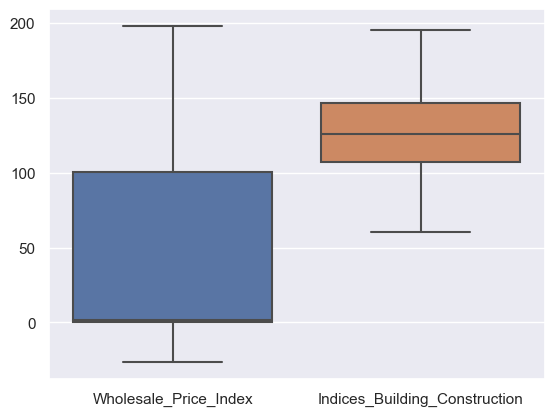

In [88]:
## checking some numeric observation's outlier
cols = ['Wholesale_Price_Index','Indices_Building_Construction']

sns.boxplot(data=df_final[cols])

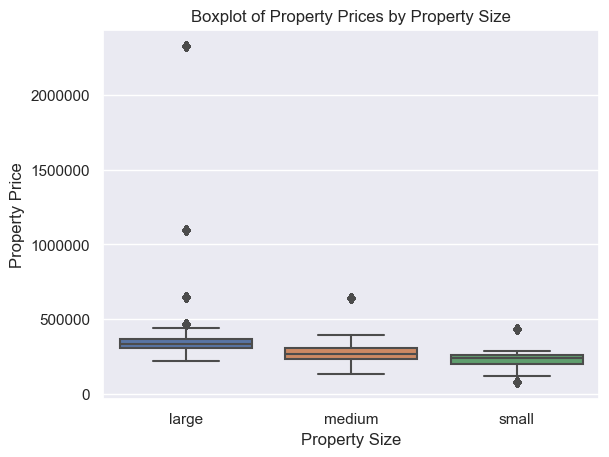

In [95]:
# house price boxplot
# Create a boxplot using seaborn
sns.boxplot(data=df_final, x='Property_Size_Description', y='Property_Price')
# Set labels and title
plt.xlabel('Property Size')
plt.ylabel('Property Price')
plt.title('Boxplot of Property Prices by Property Size')

plt.ticklabel_format(style='plain', axis='y')
# Display the plot
plt.show()

In [96]:
#Completed House count by years
# Filter unique years
years = sorted(df_final['Year'].unique())

# Create dropdown widget for year selection
year_dropdown = widgets.Dropdown(options=years, description='Year:')

# Function to update the bar plot based on the selected year
def update_bar_plot(year):
    filtered_data = df_final[df_final['Year'] == year]
    
    # Group the filtered data by house type and calculate the sum of house counts
    house_counts = filtered_data.groupby('House_Type')['House_Count'].sum()
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    house_counts.plot(kind='bar')
    
    # Set x-axis label
    plt.xlabel('House Type')
    
    # Set y-axis label
    plt.ylabel('House Count')
    
    # Set title of the plot
    plt.title(f'Completed House Count by House Type - Year: {year}')
    
    # Display the plot
    plt.show()

# Update the bar plot when year is changed
widgets.interact(update_bar_plot, year=year_dropdown)

interactive(children=(Dropdown(description='Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021), value=…

<function __main__.update_bar_plot(year)>

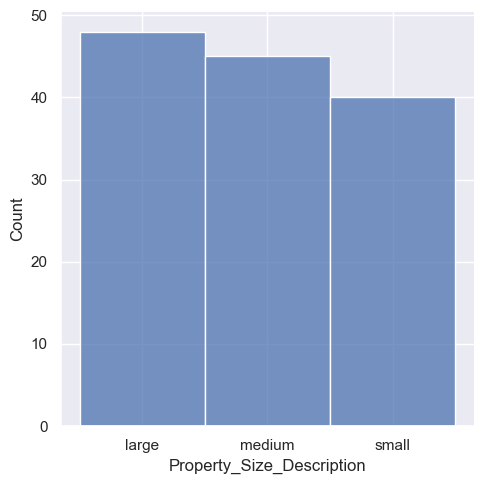

In [104]:
sns.displot(df_ppr_quarterly["Property_Size_Description"])

In [43]:
# Filter unique years and materials from the DataFrame
years = sorted(df_final['Year'].unique())
quarters = sorted(df_final['Quarter'].unique())
materials = ['Stone', 'Cement', 'Concrete blocks and bricks', 'Structural steel', 'Sand and gravel']

# Create dropdown widgets for year and quarter selection
year_dropdown = widgets.Dropdown(options=years, description='Year:')
quarter_dropdown = widgets.Dropdown(options=quarters, description='Quarter:')

# Function to update the bar plot based on the selected year and quarter
def update_bar_plot(year, quarter):
    filtered_data = df_final[(df_final['Year'] == year) & (df_final['Quarter'] == quarter)]
    
    # Create the graph object
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calculate the median wholesale price index for each material
    median_wholesale_price = []
    for material in materials:
        material_data = filtered_data[filtered_data['Material'] == material]
        median_price = material_data['Wholesale_Price_Index'].median()
        median_wholesale_price.append(median_price)
    
    # Create the bar plot
    ax.bar(materials, median_wholesale_price)
    
    # Set the x and y labels
    ax.set_xlabel('Material')
    ax.set_ylabel('Median Wholesale_Price_Index')
    
    # Set the title
    ax.set_title(f'Median Wholesale_Price_Index by Material - Year: {year}, Quarter: {quarter}')
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)
  
    # Display the graph
    plt.show()

# Update the bar plot when the year or quarter selection changes
widgets.interact(update_bar_plot, year=year_dropdown, quarter=quarter_dropdown)

interactive(children=(Dropdown(description='Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021), value=…

<function __main__.update_bar_plot(year, quarter)>

In [105]:
df_final.head()

,Month,Material,Wholesale_Price_Index,Year,Quarter,House_Type,House_Count,Type_of_Building_Construction,Indices_Building_Construction,Property_Size_Description,...,Industry,Inflation,Net_Migration,Population_0-14,Population _15-64,Population_above_65,Population growth,Population,Rural population,Urban population
0,1,"Stone, sand and gravel",95.7,2015,1,Single house,659,Building (excluding civil engineering),87.219016,large,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
1,1,"Stone, sand and gravel",95.7,2015,1,Single house,659,Building (excluding civil engineering),87.219016,medium,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
2,1,"Stone, sand and gravel",95.7,2015,1,Single house,659,Building (excluding civil engineering),87.219016,small,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,1,"Stone, sand and gravel",95.7,2015,1,Single house,659,Residential building,85.585237,large,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
4,1,"Stone, sand and gravel",95.7,2015,1,Single house,659,Residential building,85.585237,medium,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0


/Users/akermen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



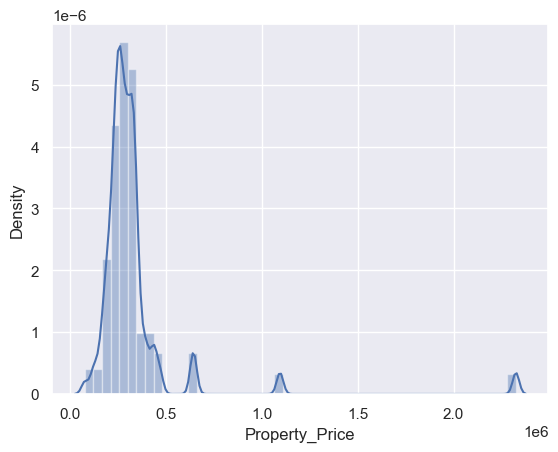

In [120]:
sns.distplot(df_final['Property_Price'])
plt.show()

In [122]:
df_final.columns

Index(['Month', 'Material', 'Wholesale_Price_Index', 'Year', 'Quarter',
       'House_Type', 'House_Count', 'Type_of_Building_Construction',
       'Indices_Building_Construction', 'Property_Size_Description',
       'Property_Price', 'Birth rate', 'GDP growth',
       'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation',
       'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population'],
      dtype='object')

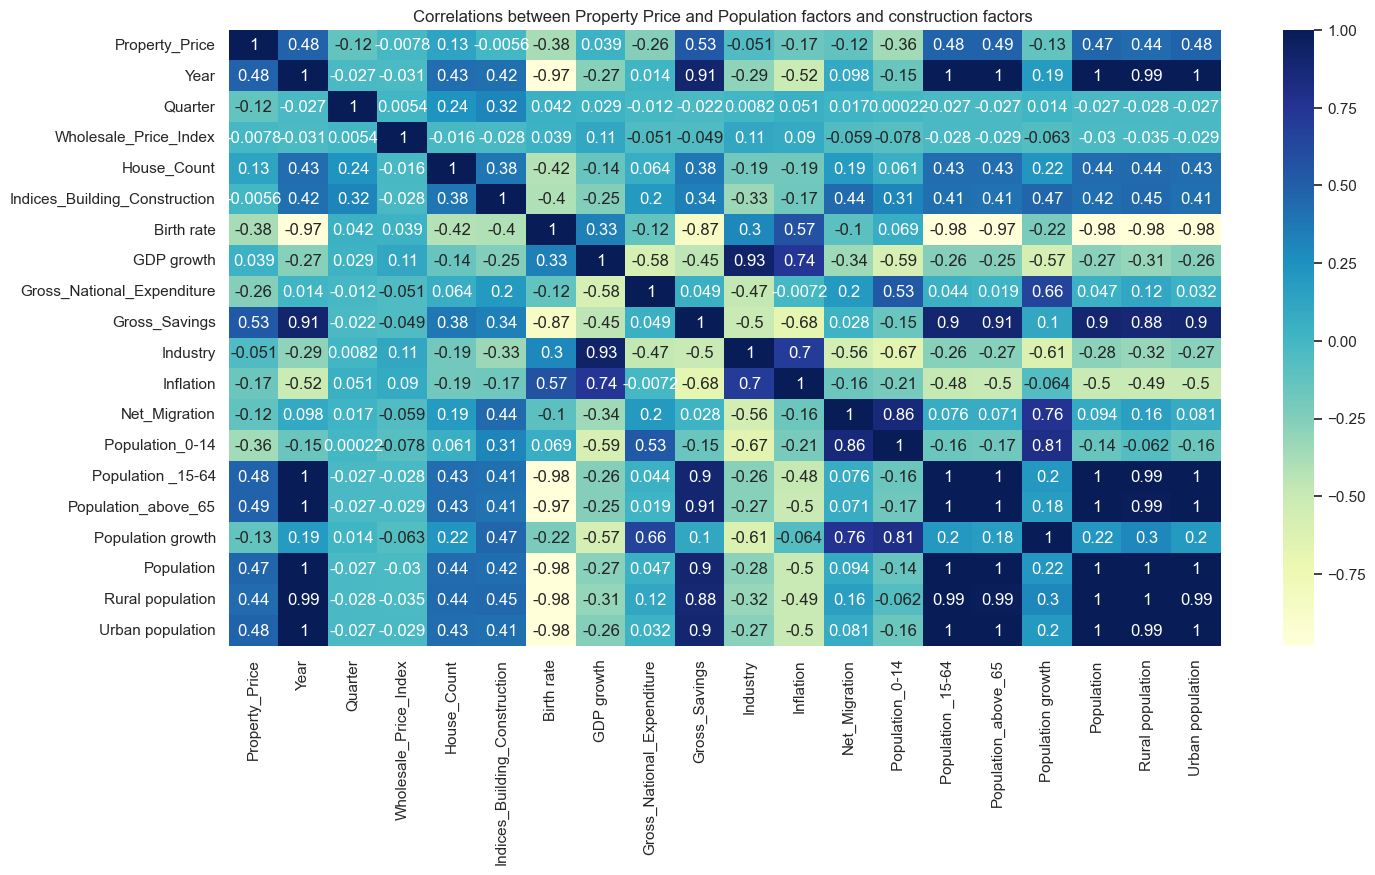

In [125]:
# correlations
# correlation matrix
df_corr=df_final[['Property_Price','Year', 'Quarter','Wholesale_Price_Index', 'House_Count',
       'Indices_Building_Construction', 'Birth rate', 'GDP growth',
       'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation',
       'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population' ]]
cor = df_corr.corr()
cor
# figure size
plt.figure(figsize=(16,8))
plt.title("Correlations between Property Price and Population factors and construction factors ")

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### Pearson tests between inflation and wholesale_price_index
* ($H_0$) hypothesis= There is no significant correlation between Wholesale_Price_Index and Property_Price.


In [107]:
# Extract the columns for Inflation and Wholesale_Price_Index
price = df_final['Property_Price']
wholesale_price_index = df_final['Wholesale_Price_Index']

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(price, wholesale_price_index)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Compare the p-value with alpha
if p_value < alpha:
    print("There is a  correlation between house price and Wholesale_Price_Index.")
else:
    print("There is no correlation between house price and Wholesale_Price_Index.")


Correlation coefficient: -0.007832557473778767
p-value: 6.105096382961987e-17
There is a  correlation between house price and Wholesale_Price_Index.


### result:
When the Wholesale Price Index (WPI) and Property Price are correlated, the findings show a correlation coefficient of -0.0078325574737767 and a p-value of 6.105096382961987e-17.

The WPI and Property Price have a very little negative link, according to the correlation coefficient. Near-zero values imply that the two variables have essentially no linear connection. The negative sign in this instance means that while the WPI marginally rises, the Property Price tends to somewhat decline, and vice versa. The strength of this association, however, is so weak that it is unlikely to have any real-world relevance or substantial effects.

The correlation that was detected has a low p-value of 6.105096382961987e-17, which means that it is statistically significant. This suggests that observing such a small link only by coincidence is extremely unlikely. It's crucial to remember that statistical significance does not necessarily translate into practical importance.


### europen uninion construction datasets for comparing
https://ec.europa.eu/eurostat/databrowser/view/STS_COPI_Q__custom_6244165/default/table?lang=en

In [45]:
df_eu_conuntries=pd.read_csv("sts_copi_q__custom_6244165_page_linear.csv")
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q1,85.2,s
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q2,85.7,s
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q3,86.6,s
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q4,87.5,s
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2003-Q1,86.7,s


In [46]:
df_eu_conuntries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     4089 non-null   object 
 1   LAST UPDATE  4089 non-null   object 
 2   freq         4089 non-null   object 
 3   indic_bt     4089 non-null   object 
 4   cpa2_1       4089 non-null   object 
 5   s_adj        4089 non-null   object 
 6   unit         4089 non-null   object 
 7   geo          4089 non-null   object 
 8   TIME_PERIOD  4089 non-null   object 
 9   OBS_VALUE    4088 non-null   float64
 10  OBS_FLAG     2233 non-null   object 
dtypes: float64(1), object(10)
memory usage: 351.5+ KB


In [47]:
df_eu_conuntries['TIME_PERIOD']=df_eu_conuntries['TIME_PERIOD'].astype(str)
df_eu_conuntries['Year'] = df_eu_conuntries['TIME_PERIOD'].str[:4].astype(int)
df_eu_conuntries['Quarter'] = df_eu_conuntries['TIME_PERIOD'].str[-1:].astype(int)
df_eu_conuntries['OBS_VALUE']=df_eu_conuntries['OBS_VALUE'].astype(float)
df_eu_conuntries.drop('TIME_PERIOD',axis=1,inplace=True)
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,OBS_VALUE,OBS_FLAG,Year,Quarter
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.2,s,2002,1
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.7,s,2002,2
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.6,s,2002,3
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,87.5,s,2002,4
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.7,s,2003,1


### Comparing EU datasets
* Construction producer prices or costs, new residential buildings 
* EU data sets include Europen Union countries 
* Datasets illustrates index quarterly
* Comparisons will be made between Ireland and other European Union countries using the following features;
 - geo (categorical feature) : country codes 
 - obs_value (numerical feature) : Construction producer prices or costs index 
 - year
 - quarter

####  https://pypi.org/project/pycountry/
* country codes convert from alpha 2 to apha-3

In [48]:
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,OBS_VALUE,OBS_FLAG,Year,Quarter
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.2,s,2002,1
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.7,s,2002,2
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.6,s,2002,3
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,87.5,s,2002,4
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.7,s,2003,1


In [49]:
df_eu_conuntries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     4089 non-null   object 
 1   LAST UPDATE  4089 non-null   object 
 2   freq         4089 non-null   object 
 3   indic_bt     4089 non-null   object 
 4   cpa2_1       4089 non-null   object 
 5   s_adj        4089 non-null   object 
 6   unit         4089 non-null   object 
 7   geo          4089 non-null   object 
 8   OBS_VALUE    4088 non-null   float64
 9   OBS_FLAG     2233 non-null   object 
 10  Year         4089 non-null   int64  
 11  Quarter      4089 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 383.5+ KB


In [50]:
df_eu_conuntries_new=df_eu_conuntries[['geo','OBS_VALUE','Year','Quarter']]
df_eu_conuntries_new.describe(include='all')

,geo,OBS_VALUE,Year,Quarter
count,4089,4088.000000,4089.000000,4089.000000
unique,38,NaN,NaN,NaN
top,FR,NaN,NaN,NaN
freq,277,NaN,NaN,NaN
mean,NaN,88.233317,2006.926877,2.496209
std,NaN,32.213649,11.998421,1.119585
min,NaN,6.000000,1953.000000,1.000000
25%,NaN,71.700000,2002.000000,1.000000
50%,NaN,93.700000,2009.000000,2.000000
75%,NaN,102.000000,2016.000000,3.000000


In [51]:
# convert alpha-2 code to alpha-3 code
df_eu_conuntries_new['geo_3'] = df_eu_conuntries_new['geo'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if pycountry.countries.get(alpha_2=x) else None)

df_eu_conuntries_new.head()

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_21023/2530568235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_conuntries_new['geo_3'] = df_eu_conuntries_new['geo'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if pycountry.countries.get(alpha_2=x) else None)


,geo,OBS_VALUE,Year,Quarter,geo_3
0,AL,85.2,2002,1,ALB
1,AL,85.7,2002,2,ALB
2,AL,86.6,2002,3,ALB
3,AL,87.5,2002,4,ALB
4,AL,86.7,2003,1,ALB


* OBS_VALUE's statistics show that there is a significant difference between min and max values and the feature's mean also shows it is the left skew and it shows that majority of outliers mean greater than 3rd quartile.

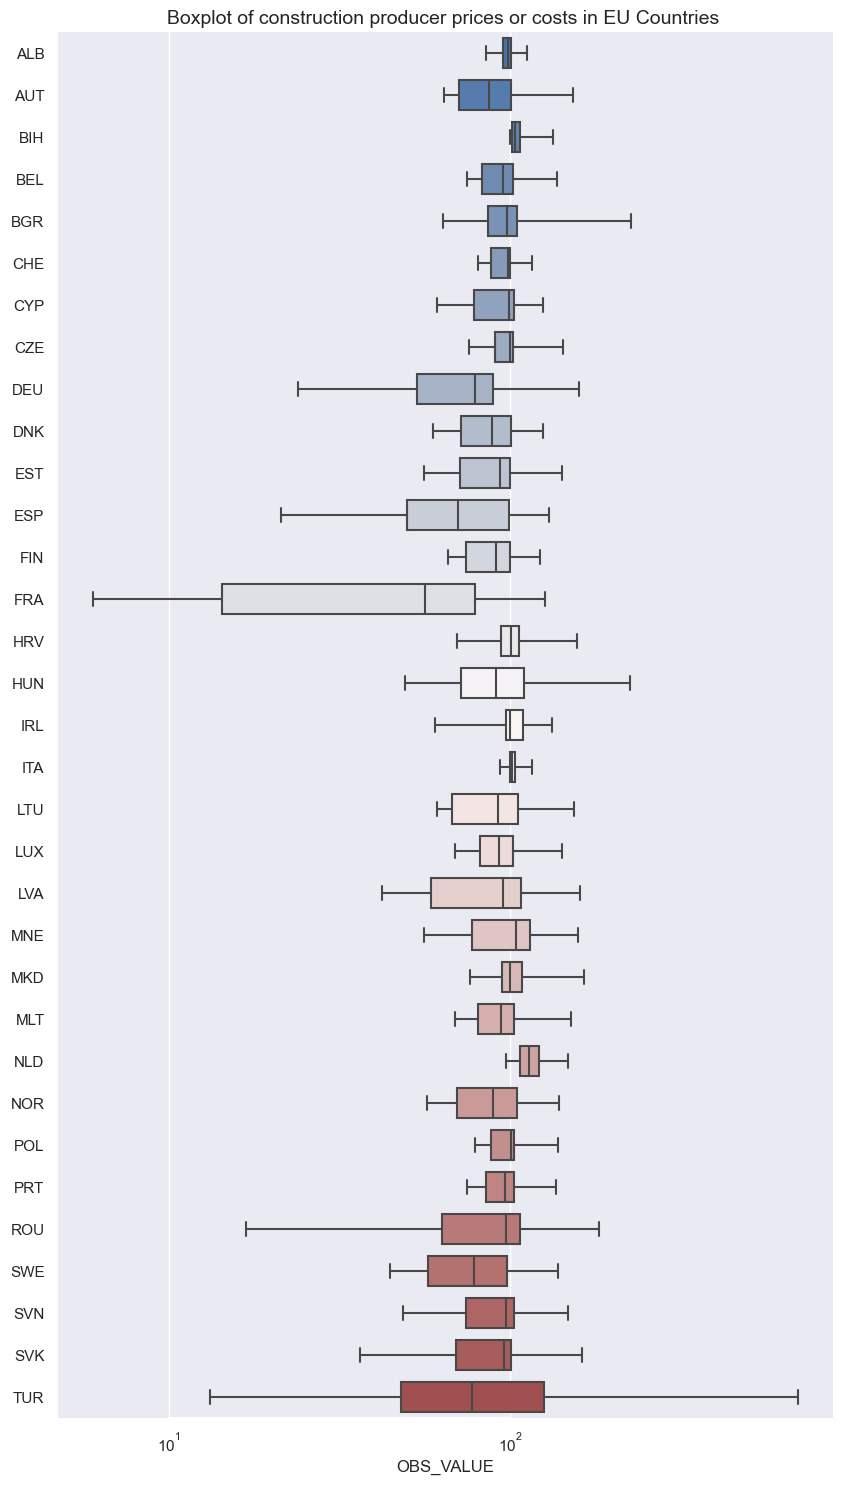

In [52]:
#boxplot for loking index in general


# https://seaborn.pydata.org/examples/horizontal_boxplot.html

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 18))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="OBS_VALUE", y="geo_3", data=df_eu_conuntries_new,
            whis=[0, 100], width=0.7, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_title("Boxplot of construction producer prices or costs in EU Countries ",fontsize=14)
#plt.xticks(rotation='vertical')
sns.despine(trim=True, left=True)



### geo


In [53]:
df_eu_conuntries_new.sort_values(by=["Year"],inplace=True)

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_21023/2171315446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_conuntries_new.sort_values(by=["Year"],inplace=True)


In [54]:
fig = px.choropleth(df_eu_conuntries_new, locations="geo_3",
                    color="OBS_VALUE", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Reds,
                    locationmode='ISO-3')

                    
fig.update_layout(
    title_text = 'Changing the construction producer prices or costs in EU Countries by year',
    geo = dict(projection_type='natural earth', scope='europe') 
)
fig.show()

In [55]:
# lets look last 10 years
df_eu_last_10years=df_eu_conuntries_new[df_eu_conuntries_new['Year']>2012]

In [56]:
fig = px.choropleth(df_eu_last_10years, locations="geo_3",
                    color="OBS_VALUE", 
                    # column to add to hover information
                    #animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Reds,
                    locationmode='ISO-3')

                    
fig.update_layout(
    title_text = 'Changing the construction producer prices or costs in EU Countries by year',
    geo = dict(projection_type='natural earth',scope='europe' ) 
)
fig.show()

### https://realpython.com/python-dash/ 


In [57]:
df_eu_conuntries_new['geo_3'].unique()

array(['FRA', 'DEU', None, 'ESP', 'SWE', 'AUT', 'FIN', 'SVK', 'DNK',
       'LTU', 'CHE', 'SVN', 'EST', 'CYP', 'HRV', 'HUN', 'BEL', 'POL',
       'PRT', 'NOR', 'ROU', 'IRL', 'LUX', 'LVA', 'MNE', 'MLT', 'TUR',
       'CZE', 'ALB', 'BGR', 'MKD', 'NLD', 'ITA', 'BIH'], dtype=object)

In [58]:
test_dict=df_eu_conuntries_new.sample(10).to_dict
print(test_dict)

<bound method DataFrame.to_dict of        geo  OBS_VALUE  Year  Quarter geo_3
2406    HU      171.8  2021        4   HUN
2853    ME       66.9  2002        3   MNE
3104    NL      111.2  2006        2   NLD
140     AT       86.3  2008        3   AUT
3908    TR       47.8  2005        3   TUR
2512    IT       97.5  2011        4   ITA
570     CY       99.2  2016        3   CYP
625     CZ       95.6  2007        2   CZE
1121  EA19       88.7  2007        1  None
588     CY      105.4  2021        1   CYP>


In [59]:
# let see last 20 years and 10 countries
cnty_lst=['FRA', 'DEU', 'ESP', 'SWE','FIN', 'DNK','BEL','NOR', 'IRL','ITA']
df=df_eu_conuntries_new[(df_eu_conuntries_new['Year']>2002)&(df_eu_conuntries_new['geo_3'].isin(cnty_lst))]
df = df.dropna(subset=['geo_3'])
df.geo_3.unique()

array(['BEL', 'NOR', 'DNK', 'SWE', 'FRA', 'ESP', 'FIN', 'DEU', 'IRL',
       'ITA'], dtype=object)

In [60]:
# Create the Dash app
app = JupyterDash(__name__)

# Create the app layout
app.layout = html.Div([
    dcc.Graph(id='line-plot'),
    dcc.Dropdown(
        id='year-filter',
        options=[{'label': str(year), 'value': str(year)} for year in df['Year'].unique()],
        value=str(df['Year'].min()),
        clearable=False
    )
])

# Define the callback function
@app.callback(
    Output('line-plot', 'figure'),
    [Input('year-filter', 'value')]
)
def update_line_plot(selected_year):
    filtered_df = df[df['Year'] == int(selected_year)]
    fig = px.line(filtered_df, x='Quarter', y='OBS_VALUE', color='geo_3')
    fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title='OBS_VALUE',
        title= 'Changing the construction producer prices or costs in EU Countries by year'
    )
    return fig

# Run the app
app.run_server(mode='inline',port=8078)

Dash is running on http://127.0.0.1:8078/



In [119]:
# Create the Dash app
app = JupyterDash(__name__)

# Create the app layout
app.layout = html.Div([
    dcc.Graph(id='line-plot'),
    dcc.Dropdown(
        id='q-filter',
        options=[{'label': str(q), 'value': str(q)} for q in df['Quarter'].unique()],
        value=str(df['Quarter'].min()),
        clearable=False
    )
])

# Define the callback function
@app.callback(
    Output('line-plot', 'figure'),
    [Input('q-filter', 'value')]
)
def update_line_plot(selected_q):
    filtered_df = df[df['Quarter'] == int(selected_q)]
    fig = px.line(filtered_df, x='Year', y='OBS_VALUE', color='geo_3')
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='OBS_VALUE',
        title= 'Changing the construction producer prices or costs in EU Countries by year'
    )
    return fig

# Run the app
app.run_server(mode='inline',port=8078)

Dash is running on http://127.0.0.1:8078/



### One-way ANOVA testing
* https://www.statology.org/one-way-anova/

* ($H_0$) hypothesis : Construction producer prices or costs are the same for European countries.
* ($H_A$) hypothesis : There is insufficient evidence that construction producer producer costs are similar.

In [62]:
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [63]:
# 4 European countries that are similar to Ireland in terms of population were selected.
# Ireland, Danmark, Finland,Slovakia and Croatia
# comparing the construction prices and costs
# Create a function to glimpse the data

def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

glimpse(df_eu_conuntries_new)

4089 rows and 5 columns


,geo,OBS_VALUE,Year,Quarter,geo_3
1950,FR,6.2,1953,4,FRA
1952,FR,6.2,1954,2,FRA
1953,FR,6.0,1954,3,FRA
1954,FR,6.0,1954,4,FRA
1951,FR,6.1,1954,1,FRA


,geo,OBS_VALUE,Year,Quarter,geo_3
2411,HU,224.7,2023,1,HUN
3448,PT,136.5,2023,1,PRT
2557,IT,116.0,2023,1,ITA
198,AT,153.1,2023,1,AUT
2658,LT,152.8,2023,1,LTU


In [64]:
# Subsetting:
df_ie=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='IRL']
df_dn=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='DNK']
df_fn=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='FIN']
df_sl=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='SVK']
df_cr=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='HRV']

stats.f_oneway(df_ie['OBS_VALUE'], df_dn['OBS_VALUE'], df_fn['OBS_VALUE'],df_sl['OBS_VALUE'],df_cr['OBS_VALUE'])



F_onewayResult(statistic=14.494052948640087, pvalue=3.1558924387600974e-11)

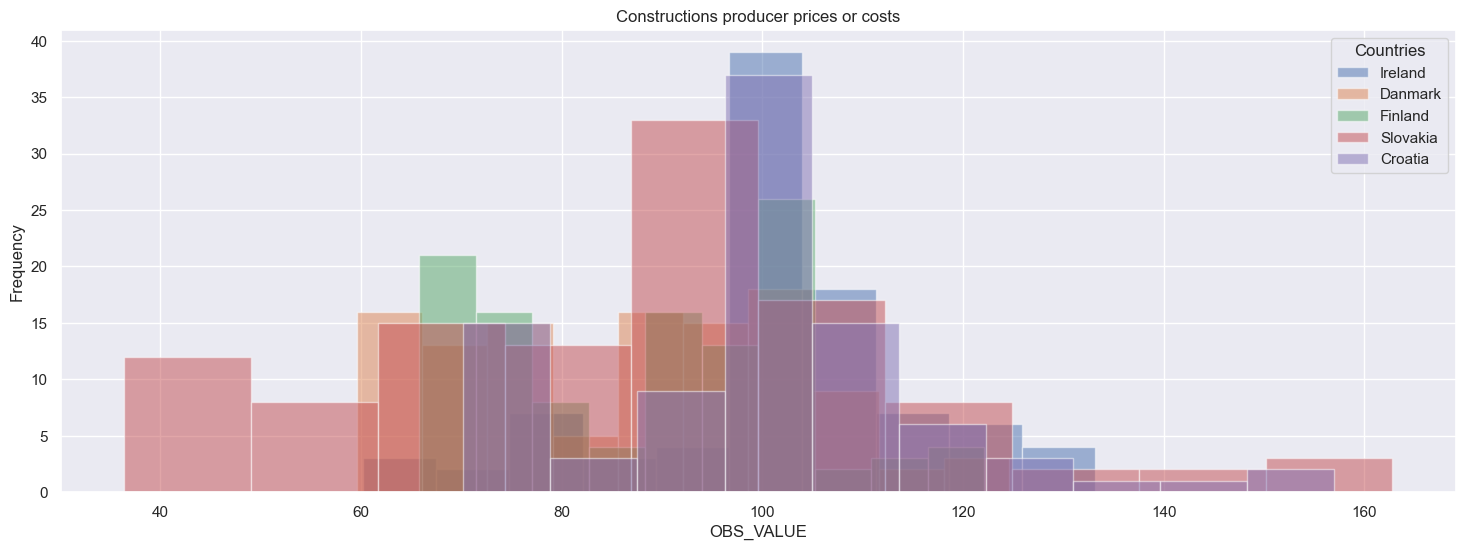

In [65]:
# Add three histograms to one plot
plt.figure(figsize=(18, 6))

plt.hist(df_ie['OBS_VALUE'], alpha=0.5, label='Ireland')
plt.hist(df_dn['OBS_VALUE'], alpha=0.5, label='Danmark')
plt.hist(df_fn['OBS_VALUE'], alpha=0.5, label='Finland')
plt.hist(df_sl['OBS_VALUE'], alpha=0.5, label='Slovakia')
plt.hist(df_cr['OBS_VALUE'], alpha=0.5, label='Croatia')


# Add plot title and axis labels
plt.title('Constructions producer prices or costs')
plt.xlabel('OBS_VALUE')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Countries')

# Display plot
plt.show()

## Machine Learning

> A model will be created to estimate the effect of construction activities carried out, number of houses built, material prices in the construction sector, annual inflation, population components and immigration numbers on the median price of house sales in Ireland.

> The problem is a supervised regression problem as it is based on a continuous variable estimation and we have historical data and we have sample values for the dependent variable.
 
> Linear Regression, Decision Trees, Artificial Neural Networks, Random Forest algorithms will be applied and the results will be compared.


### Feature engineering
* df_final
* dataset include 25 ovservations : 4 categorical and 20 numerical
* As a caegorical feature, House_Type includes three diffrent house type
* Material feature shows 39 differen construction materials so top 5 groups are selected, ['Stone', 'Cement', 'Concrete blocks and bricks', 'Structural steel', 'Sand and gravel']
* Type_of_Building_Construction feature includes four type of constructions
* Property_Size_Description feature includes 3 types of property
* Categorical variables will be made numeric by applying pandas get_dummies method for these tree categorical variables.
* The data will be made suitable for machine learning algorithms by applying standardization processes on other numerical variables other than month, year, quarter variables.

In [131]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140048 entries, 0 to 1213055
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Month                          1140048 non-null  int64  
 1   Material                       1140048 non-null  object 
 2   Wholesale_Price_Index          1140048 non-null  float64
 3   Year                           1140048 non-null  int64  
 4   Quarter                        1140048 non-null  int64  
 5   House_Type                     1140048 non-null  object 
 6   House_Count                    1140048 non-null  int64  
 7   Type_of_Building_Construction  1140048 non-null  object 
 8   Indices_Building_Construction  1140048 non-null  float64
 9   Property_Size_Description      1140048 non-null  object 
 10  Property_Price                 1140048 non-null  float64
 11  Birth rate                     1140048 non-null  float64
 12  GDP growth    

In [109]:
df_final['House_Type'].unique()

array(['Single house', 'Scheme house', 'Apartment'], dtype=object)

In [110]:
df_final['Type_of_Building_Construction'].unique()

array(['Building (excluding civil engineering)', 'Residential building',
       'Non-residential building', 'Civil engineering'], dtype=object)

In [111]:
df_final['Material'].unique()

array(['Stone, sand and gravel', 'Sand and gravel', 'Stone', 'Cement',
       'Ready mixed mortar and concrete', 'Concrete blocks and bricks',
       'Other concrete products including precast',
       'Other concrete products (excluding precast concrete)',
       'Precast concrete', 'Structural steel and reinforcing metal',
       'Structural steel', 'Other structural steel',
       'Structural steel fabricated metal', 'Reinforcing metal',
       'Other steel products', 'Rough timber (including plain sawn)',
       'Rough timber (softwood)', 'Rough timber (hardwood)',
       'Machined, treated engineered timber', 'Other treated timber',
       'Wooden windows and doors',
       'Bituminous macadam, asphalt and bituminous emulsions',
       'Bituminous macadam and asphalt', 'Bituminous emulsions',
       'Electrical fittings', 'Lighting equipment',
       'Protection and communication equipment', 'All other materials',
       'Plumbing materials including sanitary ware',
       'HVAC (

In [114]:
df_final['Property_Size_Description'].unique()

array(['large', 'medium', 'small'], dtype=object)

In [137]:
material_list=['Stone', 'Cement', 'Concrete blocks and bricks', 'Structural steel', 'Sand and gravel']

df_filter=df_final[df_final['Material'].isin(material_list)]
df_filter['Material'].unique()

array(['Sand and gravel', 'Stone', 'Cement', 'Concrete blocks and bricks',
       'Structural steel'], dtype=object)

In [138]:
df_filter.shape

(146160, 25)

In [139]:
## encoding
df_encoding=pd.get_dummies(df_filter,columns=['Material','House_Type','Type_of_Building_Construction','Property_Size_Description'])
df_encoding.head()

,Month,Wholesale_Price_Index,Year,Quarter,House_Count,Indices_Building_Construction,Property_Price,Birth rate,GDP growth,Gross_National_Expenditure,...,House_Type_Apartment,House_Type_Scheme house,House_Type_Single house,Type_of_Building_Construction_Building (excluding civil engineering),Type_of_Building_Construction_Civil engineering,Type_of_Building_Construction_Non-residential building,Type_of_Building_Construction_Residential building,Property_Size_Description_large,Property_Size_Description_medium,Property_Size_Description_small
144,1,98.0,2015,1,659,87.219016,220000.000,13.9,24.370445,71.251034,...,0,0,1,1,0,0,0,1,0,0
145,1,98.0,2015,1,659,87.219016,131277.765,13.9,24.370445,71.251034,...,0,0,1,1,0,0,0,0,1,0
146,1,98.0,2015,1,659,87.219016,75000.000,13.9,24.370445,71.251034,...,0,0,1,1,0,0,0,0,0,1
147,1,98.0,2015,1,659,85.585237,220000.000,13.9,24.370445,71.251034,...,0,0,1,0,0,0,1,1,0,0
148,1,98.0,2015,1,659,85.585237,131277.765,13.9,24.370445,71.251034,...,0,0,1,0,0,0,1,0,1,0


In [140]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146160 entries, 144 to 1210367
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   Month                                                                 146160 non-null  int64  
 1   Wholesale_Price_Index                                                 146160 non-null  float64
 2   Year                                                                  146160 non-null  int64  
 3   Quarter                                                               146160 non-null  int64  
 4   House_Count                                                           146160 non-null  int64  
 5   Indices_Building_Construction                                         146160 non-null  float64
 6   Property_Price                                                        146160 non-

In [142]:
df_encoding.columns

Index(['Month', 'Wholesale_Price_Index', 'Year', 'Quarter', 'House_Count',
       'Indices_Building_Construction', 'Property_Price', 'Birth rate',
       'GDP growth', 'Gross_National_Expenditure', 'Gross_Savings', 'Industry',
       'Inflation', 'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population', 'Material_Cement',
       'Material_Concrete blocks and bricks', 'Material_Sand and gravel',
       'Material_Stone', 'Material_Structural steel', 'House_Type_Apartment',
       'House_Type_Scheme house', 'House_Type_Single house',
       'Type_of_Building_Construction_Building (excluding civil engineering)',
       'Type_of_Building_Construction_Civil engineering',
       'Type_of_Building_Construction_Non-residential building',
       'Type_of_Building_Construction_Residential building',
       'Property_Size_Description_large', 'Property_Size_Description_medium',
       'Pr

In [143]:
# standardization
# Create a StandardScaler object
scaler = StandardScaler()
numeric_cols=['Wholesale_Price_Index', 'House_Count',
       'Indices_Building_Construction', 'Birth rate', 'GDP growth',
       'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation',
       'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population']
# create a copy of df
df_ml=df_encoding.copy()

# Apply Z-score normalization to the numeric columns
df_ml[numeric_cols] = scaler.fit_transform(df_ml[numeric_cols])
df_ml.head()


,Month,Wholesale_Price_Index,Year,Quarter,House_Count,Indices_Building_Construction,Property_Price,Birth rate,GDP growth,Gross_National_Expenditure,...,House_Type_Apartment,House_Type_Scheme house,House_Type_Single house,Type_of_Building_Construction_Building (excluding civil engineering),Type_of_Building_Construction_Civil engineering,Type_of_Building_Construction_Non-residential building,Type_of_Building_Construction_Residential building,Property_Size_Description_large,Property_Size_Description_medium,Property_Size_Description_small
144,1,1.142525,2015,1,-0.719407,-1.580660,220000.000,1.583638,2.454371,-0.822488,...,0,0,1,1,0,0,0,1,0,0
145,1,1.142525,2015,1,-0.719407,-1.580660,131277.765,1.583638,2.454371,-0.822488,...,0,0,1,1,0,0,0,0,1,0
146,1,1.142525,2015,1,-0.719407,-1.580660,75000.000,1.583638,2.454371,-0.822488,...,0,0,1,1,0,0,0,0,0,1
147,1,1.142525,2015,1,-0.719407,-1.644916,220000.000,1.583638,2.454371,-0.822488,...,0,0,1,0,0,0,1,1,0,0
148,1,1.142525,2015,1,-0.719407,-1.644916,131277.765,1.583638,2.454371,-0.822488,...,0,0,1,0,0,0,1,0,1,0


In [144]:
df_ml.columns

Index(['Month', 'Wholesale_Price_Index', 'Year', 'Quarter', 'House_Count',
       'Indices_Building_Construction', 'Property_Price', 'Birth rate',
       'GDP growth', 'Gross_National_Expenditure', 'Gross_Savings', 'Industry',
       'Inflation', 'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population', 'Material_Cement',
       'Material_Concrete blocks and bricks', 'Material_Sand and gravel',
       'Material_Stone', 'Material_Structural steel', 'House_Type_Apartment',
       'House_Type_Scheme house', 'House_Type_Single house',
       'Type_of_Building_Construction_Building (excluding civil engineering)',
       'Type_of_Building_Construction_Civil engineering',
       'Type_of_Building_Construction_Non-residential building',
       'Type_of_Building_Construction_Residential building',
       'Property_Size_Description_large', 'Property_Size_Description_medium',
       'Pr

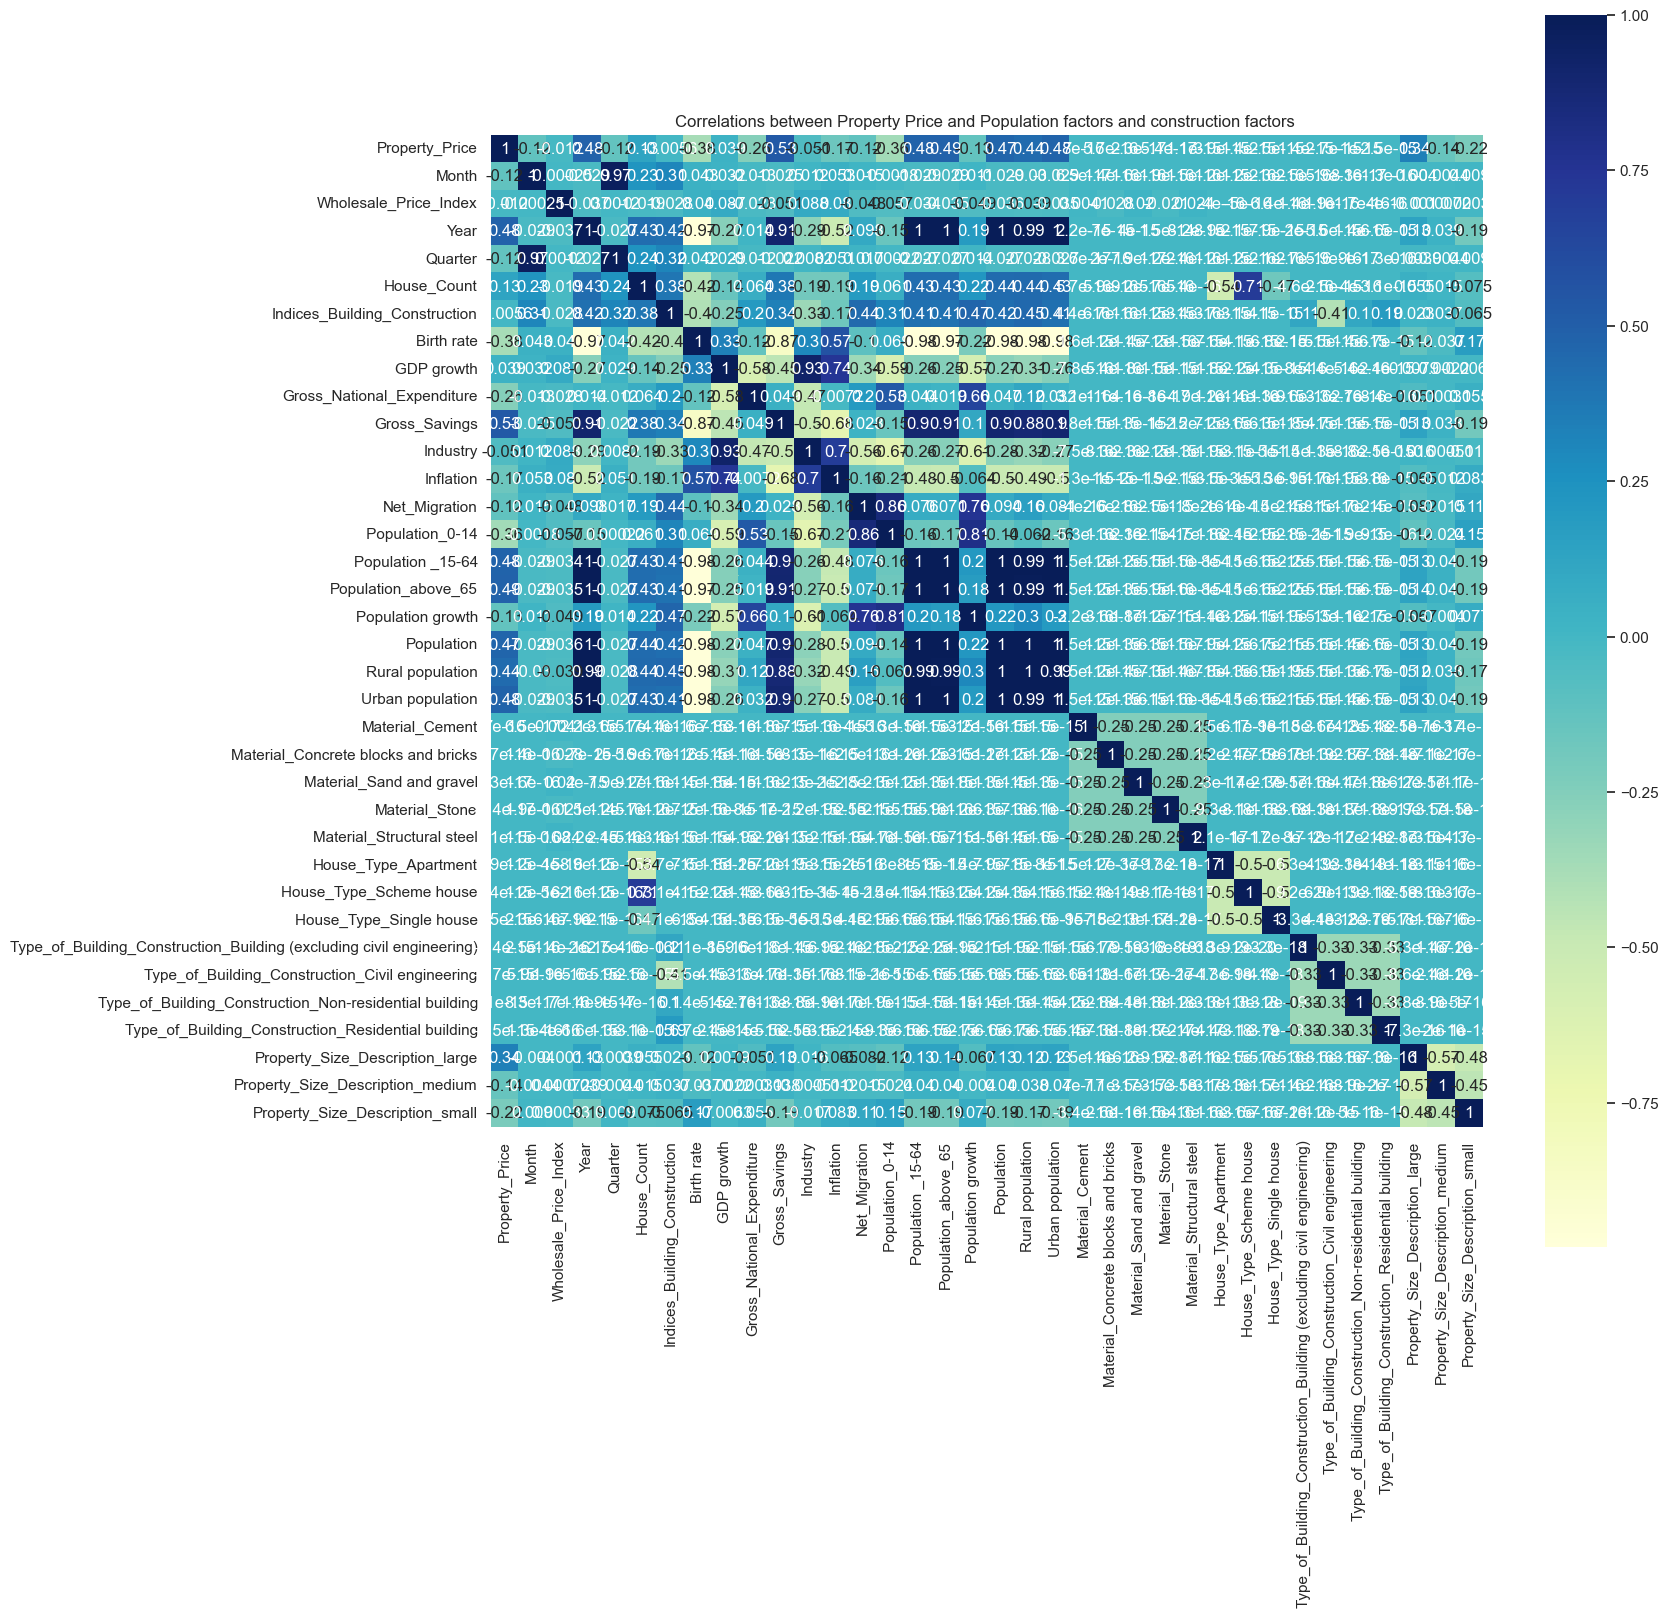

In [155]:
## lets check correlations again
# correlation matrix
df_corr=df_ml[['Property_Price','Month', 'Wholesale_Price_Index', 'Year', 'Quarter', 'House_Count',
       'Indices_Building_Construction', 'Birth rate',
       'GDP growth', 'Gross_National_Expenditure', 'Gross_Savings', 'Industry',
       'Inflation', 'Net_Migration', ' Population_0-14', 'Population _15-64',
       'Population_above_65', 'Population growth', 'Population',
       'Rural population', 'Urban population', 'Material_Cement',
       'Material_Concrete blocks and bricks', 'Material_Sand and gravel',
       'Material_Stone', 'Material_Structural steel', 'House_Type_Apartment',
       'House_Type_Scheme house', 'House_Type_Single house',
       'Type_of_Building_Construction_Building (excluding civil engineering)',
       'Type_of_Building_Construction_Civil engineering',
       'Type_of_Building_Construction_Non-residential building',
       'Type_of_Building_Construction_Residential building',
       'Property_Size_Description_large', 'Property_Size_Description_medium',
       'Property_Size_Description_small']]
cor = df_corr.corr()
# figure size
plt.figure(figsize=(16,16))
plt.title("Correlations between Property Price and Population factors and construction factors ")

# heatmap
sns.heatmap(cor,  annot=True, cmap='YlGnBu', square=True)
plt.show()


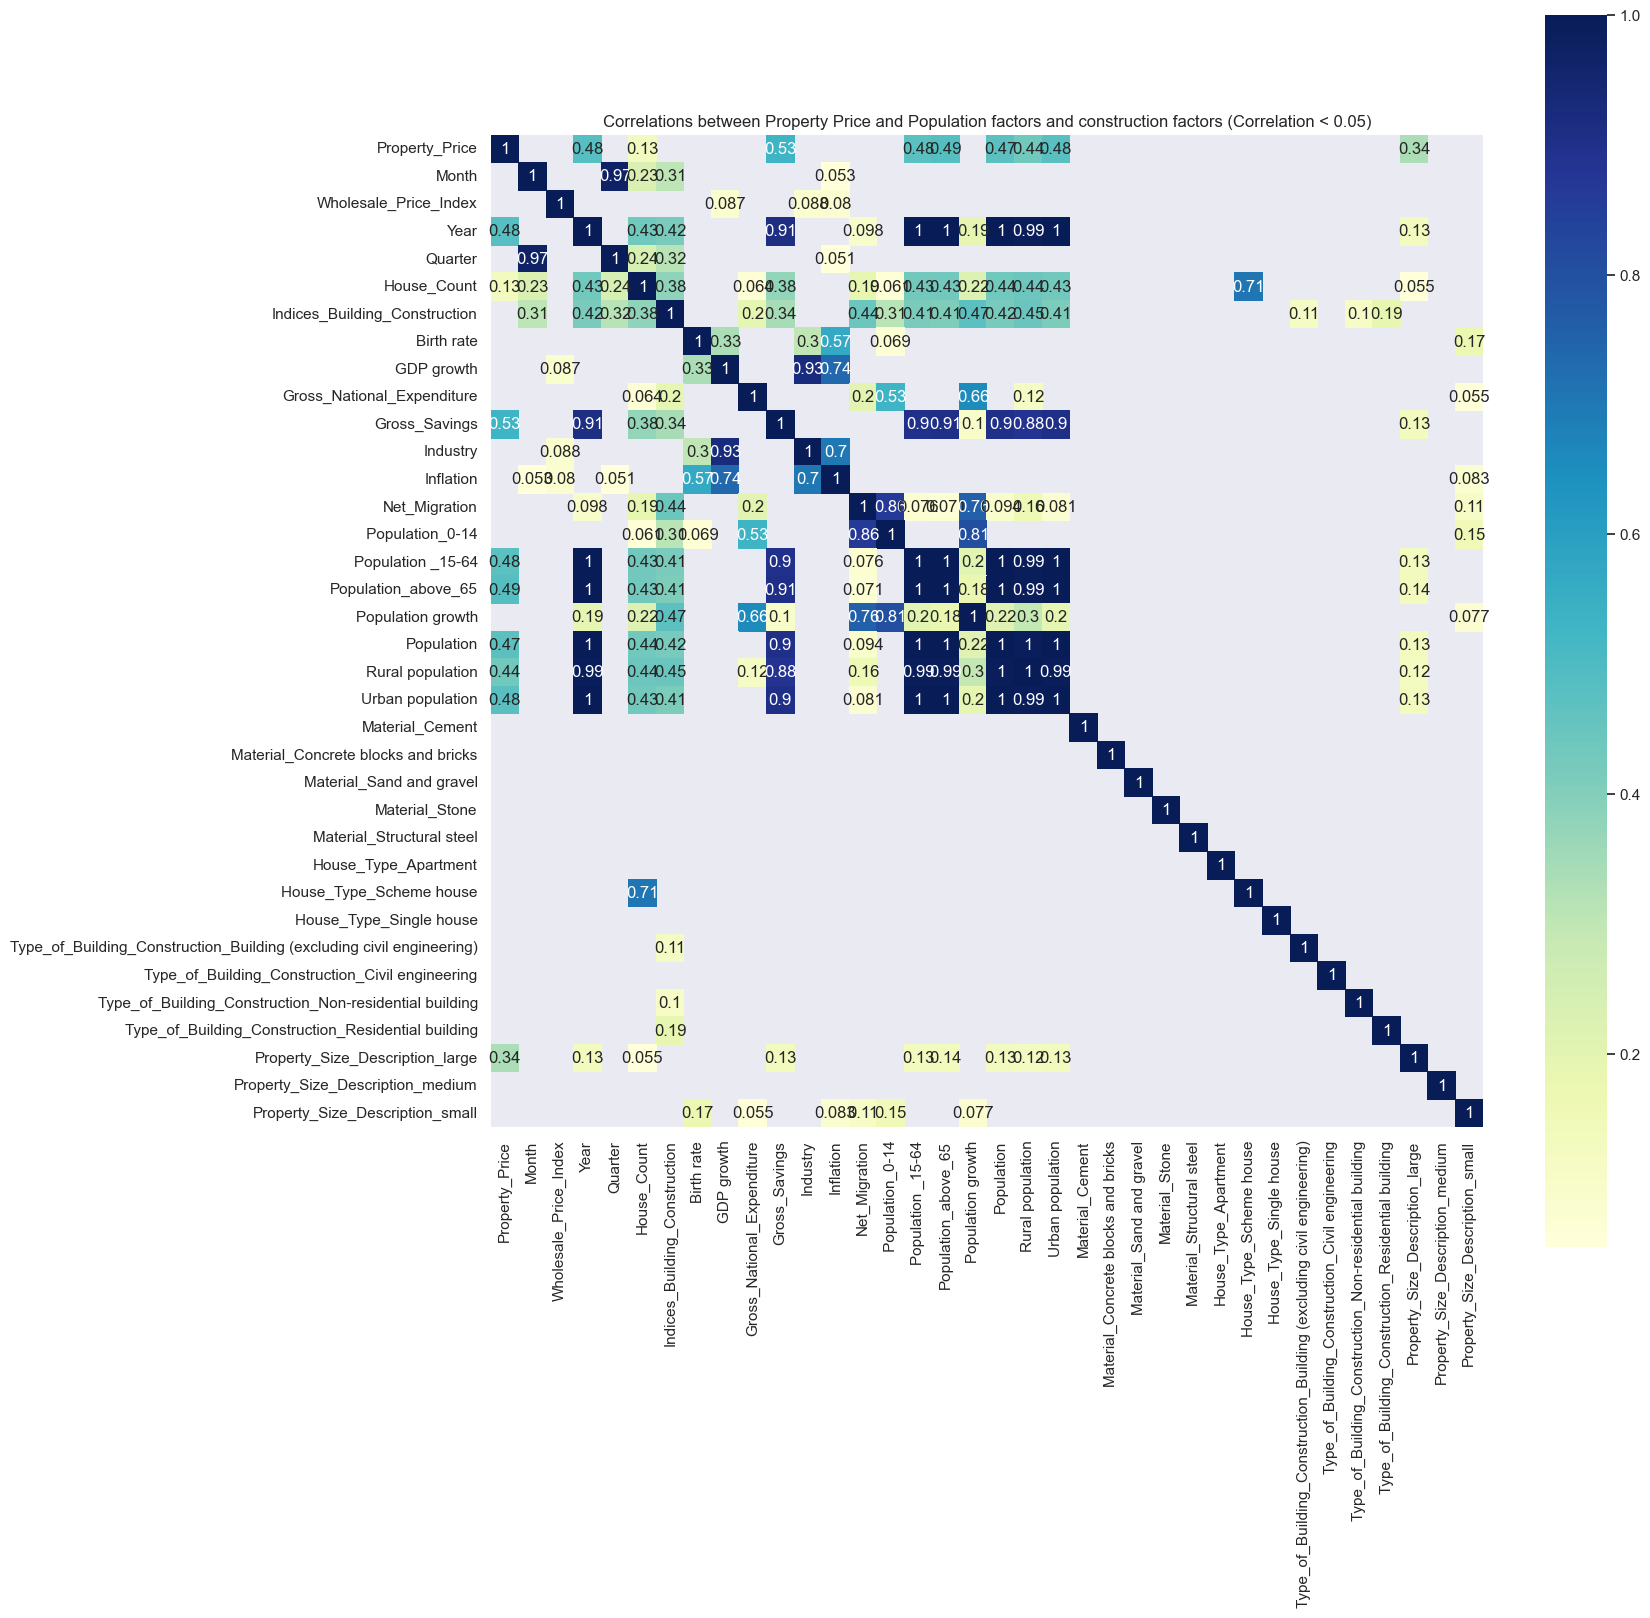

In [160]:
# it is hard to see correlations because of dataset shape,Let's visualize variables with a positive correlation greater than 0.05
corr_pozitive=cor[cor >0.05]
plt.figure(figsize=(16,16))
plt.title("Correlations between Property Price and Population factors and construction factors (Correlation < 0.05)")

# heatmap
sns.heatmap(corr_pozitive,  annot=True, cmap='YlGnBu', square=True)
plt.show()


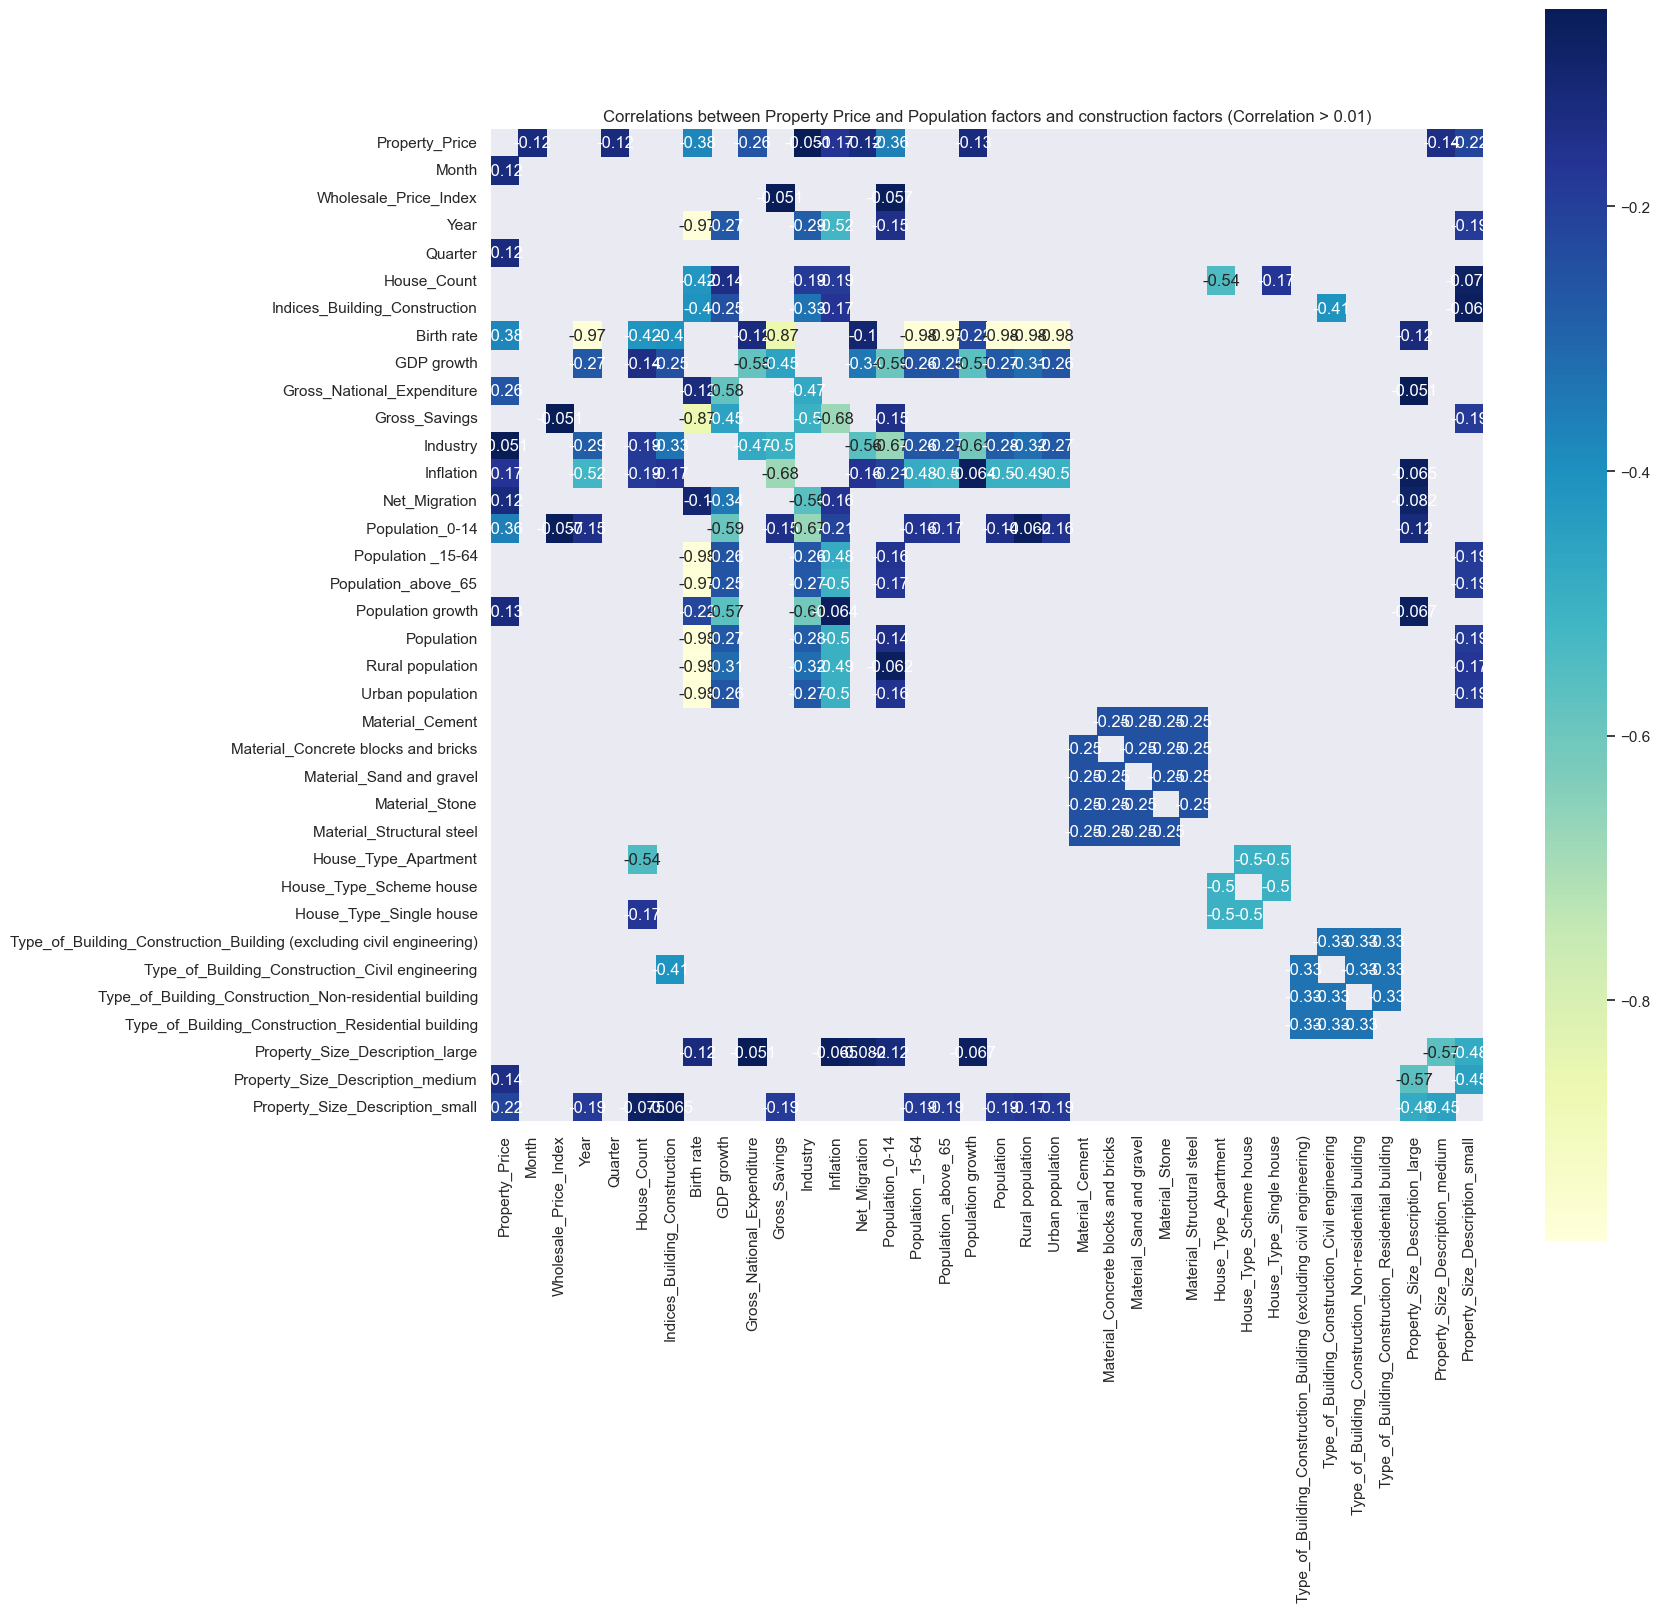

In [162]:
## and let see negative correlations
# it is hard to see correlations because of dataset shape,Let's visualize variables with a positive correlation greater than 0.01
corr_negative=cor[cor < -0.05]
plt.figure(figsize=(16,16))
plt.title("Correlations between Property Price and Population factors and construction factors (Correlation > 0.01)")

# heatmap
sns.heatmap(corr_negative,  annot=True, cmap='YlGnBu', square=True)
plt.show()

## Models 

In [163]:
# Split the DataFrame into features (X) and target variable (y)
X = df_ml.drop('Property_Price', axis=1)  
y = df_ml['Property_Price'] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression with Kfol GridsearchCv method

In [165]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 35))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [168]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.000858,0.087710,0.004450,0.000223,1,{'n_features_to_select': 1},0.229180,0.232585,0.237407,0.225636,...,0.230593,0.004072,34,0.231616,0.230741,0.235567,0.223604,0.231772,0.230660,0.003899
1,0.953618,0.016978,0.005558,0.000086,2,{'n_features_to_select': 2},0.377824,0.376890,0.327415,0.378136,...,0.365809,0.019504,33,0.374982,0.375274,0.326137,0.374964,0.377162,0.365704,0.019800
2,0.965176,0.036884,0.005014,0.000343,3,{'n_features_to_select': 3},0.381789,0.401707,0.328115,0.450205,...,0.386140,0.040076,32,0.378628,0.400538,0.327214,0.447760,0.377163,0.386261,0.039022
3,0.937122,0.006284,0.006447,0.000161,4,{'n_features_to_select': 4},0.416279,0.449184,0.339064,0.450205,...,0.420458,0.042630,31,0.411947,0.449105,0.338346,0.447760,0.452690,0.419969,0.043402
4,0.925824,0.005284,0.008960,0.000517,5,{'n_features_to_select': 5},0.467117,0.452648,0.387829,0.452100,...,0.442401,0.027879,30,0.460640,0.452872,0.390949,0.449527,0.457384,0.442274,0.025941


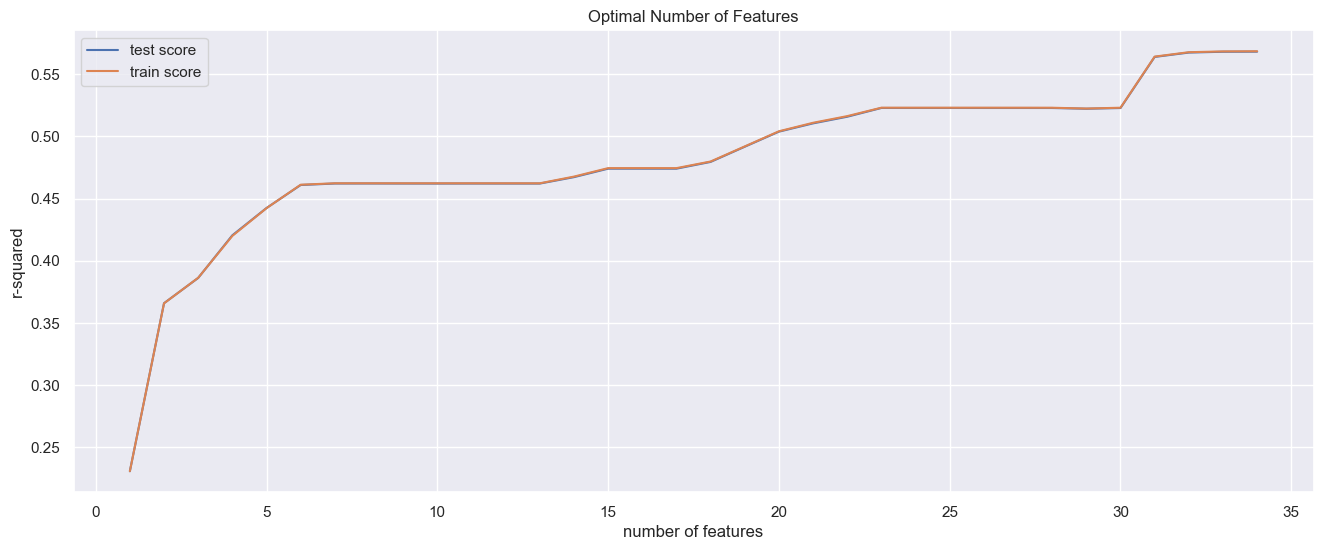

In [174]:
# see the results
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### it looks like over-fitting , lets check after chosing features
number of optimal feature =22


In [175]:
# final model
n_features_optimal = 22

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5626738288435025
